# Python - The Language That Can Do Anything

Intro to Python programming language for non-pythoners.

Some programming languages are just overcomplicated.

Here is a simple "hello, world" program in Java for example:


```java
public class HelloWorld {
    private static HelloWorld instance;
    private String greeting = "Hello, World!";

    private HelloWorld() { }

    public static HelloWorld getInstance() {
        if (instance == null) {
            instance = new HelloWorld();
        }
        return instance;
    }

    public void sayHello() {
        System.out.println(greeting);
    }

    public static void main(String[] args) {
        HelloWorld hw = HelloWorld.getInstance();
        hw.sayHello();
    }
}
```


In JavaScript we have:

|left operand|operator|right operand|result|
|------------|--------|-------------|------|
|`[]` (empty array)|+|`[]` (empty array)|`""` (empty string)|
|`[]` (empty array)|+|`{}` (empty object)|`"[object Object]"` (string)|
|`false` (boolean)|+|`[]` (empty array)|`"false"` (string)|
|`"123"`(string)|+|`1` (number)|`"1231"` (string)|
|`"123"` (string)|-|`1` (number)|`122` (number)|
|`"123"` (string)|-|`"abc"` (string)|`NaN` (number)|

And `{} + []` is `0` (empty code block and an empty array is obviously `0`), but when warpped in brackets, `({} + [])` then it is a string: `"[object Object]"`.

C is better:

```c
#include <stdio.h>

int main() {
   printf("Hello, World!");
   return 0;
}
```

## Python time!

In [21]:
print("Hello, World!")

Hello, World!


## Overview

* Python is a general purpose, high level programming language, first released in 1991 by Guido van Rossum.
* One of the most popular programming languages, currently #1 on TIOBE index.
* Used in a wide variety of applications, including web development, scientific computing, data analysis, and artificial intelligence.
* Used as a scripting language to automate tasks and as a glue language to connect different software components together.
* Readability. Python code is designed to be easy to read and understand, using English keywords and minimal punctuation.

## Features

* **Interpreted language** - it is ran by an interpreter, the source is not complied.
* **Dynamic typing** - the variables have no fixed types and can hold any value.
* **Built-in data types** -  a large set of simple and elegant high level data types to hold any kind of data.
* **Large standard libary** -  the standard libary is large and comes with variery of packages and modules. Also, the satndard libary includes a powerful unit test framework.
* **Variety of programming styles:** 
  * Object oriented style - the code is formed as a set of classes and methods in them.
  * Functional style - every statement is a function. The `functools` module can be utilized to achive this style.
  * Procedural style - the program is written as a set of methods which interact with each other.

## Code style and syntax

* The Python Enhancement Proposal 8 ([PEP-8](https://peps.python.org/pep-0008/)) gives a detailed guide how to format and write the code.
* [PEP-20](https://peps.python.org/pep-0020/) describes the zen of Python.
* Coments are denoted by `#`.
* Indentation and puctation is used to indicate blocks of code.
```python
if x>2:
    print("Big number")
```
* Lines of code are terminated by the newline character. Multi line code is possible, then the last charecter in the line must be the backslash (`\`) character.
* Variables are defined by their name and an assigned value:
```python
x = 2
```
* Functions are defined with the `def` keyword:
```python
def add(x, y):
    return x+y
```

* Classes are defined with the `class` keyword:
```python
class Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age
```
```python
class Cannibal(Person):
    def __init__(self, name, age):
        super(name, age)
        self.eats_human_flesh = True
```

## A typical python project setup

* No pre-defined structure is enforced.
* Scripts are typically self contained and relie only on the standard python distribution.
* When used as a language for a project, the typical project setup looks like this:
    ```
    <root>
      |
      +- src/
      |   |
      |   +-- apps.py
      |   +-- utils.py
      |   +-- ...
      +- tests/ 
      |   |
      |   +-- test_apps.py
      |   +-- test_utils.py
      |   +-- ...
      |
      +-- requirements.txt
    ```
* For complex projects use, create a virtual environemnt before.
  * It is a separate python installation which is used only in the given project.
* requirements.txt - a file which declares the required libraries for the project.


# Coding time

Enough talking, let's see some examples!

## Classification problem

* Create a classifier for the Iris dataset
* Use Supprt Vector Machines to implement the classification

In [22]:
# import the necessary libraries
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [23]:
# Load the dataset and transform it to a dataframe
iris = datasets.load_iris()
iris_df = pd.DataFrame(
    data=np.c_[iris['data'], iris['target']],
    columns=iris['feature_names'] + ['target']
)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


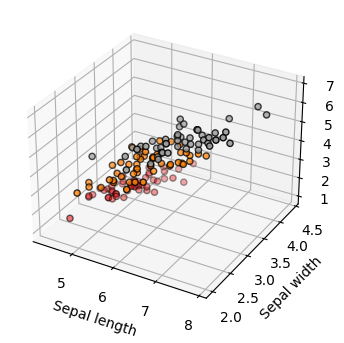

In [24]:
# Visualize the Iris dataset
import matplotlib.pyplot as plt

X, y = iris.data, iris.target

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=y, cmap=plt.cm.Set1, edgecolor='k')
ax.set_xlabel("Sepal length")
ax.set_ylabel("Sepal width")
ax.set_zlabel("Petal length")
plt.show()

In [25]:
# Split the data into training and test data set
X = iris_df.iloc[:, :-1]
y = iris_df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

# Initialize and train the SVM
clf = SVC(kernel='linear', C=1)
clf.fit(X_train, y_train)

# Use the trained classifier to predict the labels of the test data
y_pred = clf.predict(X_test)

# Evaluate the classifier's performance using the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.97


## REST API for a TODO app

We have the following requirement:

As a User I want to:
* Create a new TODO item
* Updtae an existing TODO item
* Get a TODO item
* List the TODO items
* Delete a TODO item
* The endpoints are exposed under `/api/todos` path

A TODO item consists of:
* `id` - primary key, unique
* `title` - the title of the item
* `body` - the body of the item
* `done` - a boolen flag which indicates if the item is done, or not, the default is flase

### Implementation

* Create a folder for the project: `mkdir todo_app`
* Create and activate a virtual environemnt inside the folder `cd todo_app && python3 -m venv venv && source venv/bin/activate`
* We'll use Flask for it's simplicity, so define the requirements, `requirements.txt`:
  ```
  flask==2.2.2
  flask-sqlalchemy==3.0.2
  ```
* Install the requirements: `python -m pip install -r requirements`
* Create a folder called `src`, and add an empty file `app.py`
* Now we can start to implement the API

#### app.py

```python
# Import the required modules
from flask import Flask, request
from flask_sqlalchemy import SQLAlchemy

# Configure the Flask app, set up a connection to DB
app = Flask(__name__)
app.config['SQLALCHEMY_DATABASE_URI'] = 'sqlite:///db.sqlite3'
app.config['SQLALCHEMY_TRACK_MODIFICATIONS'] = False
db = SQLAlchemy()
db.init_app(app)

# Model

# Handlers


# Add entry point
if __name__ == '__main__':
    with app.app_context():
        db.create_all()
    app.run(debug=True, port=8000)
```

We have the skeleton, let's extend it.

#### define the todo model

```python
# Model

class TodoItem(db.Model):
    id = db.Column(db.Integer, primary_key=True)
    title = db.Column(db.String(80), nullable=False)
    description = db.Column(db.String(120), nullable=False)
    done = db.Column(db.Boolean, default=False)

    def as_dict(self):
        return {c.name: getattr(self, c.name) for c in self.__table__.columns}
```

#### define the handlers

```python
# Handlers
@app.route('/api/todos', methods=['GET', 'POST'])
def get_or_create_todo_items():
    if request.method == 'GET':
        return [i.as_dict() for i in TodoItem.query.all()]
    elif request.method == 'POST':
        data = request.get_json()
        if not data:
            return {'error': 'No data provided'}, 400
        if not data.get('title'):
            return {'error': 'No title provided'}, 400
        if not data.get('description'):
            return {'error': 'No description provided'}, 400

        data = {k: v for k, v in data.items() if k in TodoItem.__table__.columns.keys()}
        todo_item = TodoItem(title=data['title'], description=data['description'], done=data.get('done', False))
        db.session.add(todo_item)
        db.session.commit()
        return todo_item.as_dict()

```

```python
@app.route('/api/todos/<int:todo_id>', methods=['GET', 'PUT', 'DELETE'])
def manage_todo_item(todo_id: int):
    todo = db.session.get(TodoItem, todo_id)
    if todo is None:
        return {'error': 'Todo item not found'}, 404
    if request.method == 'GET':
        return todo.as_dict()
    elif request.method == 'PUT':
        data = request.get_json()
        todo.title = data.get('title', todo.title)
        todo.description = data.get('description', todo.description)
        todo.done = data.get('done', todo.done)
        db.session.commit()
        return todo.as_dict()
    elif request.method == 'DELETE':
        db.session.delete(todo)
        db.session.commit()
        return '', 204
```

* Run the app:
```
> python app.py
 * Serving Flask app 'app'
 * Debug mode: on
WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:8000
Press CTRL+C to quit
 * Restarting with stat
 * Debugger is active!
 * Debugger PIN: 531-433-521
```
* Now the endpoints can be accessed

## Streaming files

* From a given set of image files, an animation has to be streamed
* A music should be played alongside the animation

We'll use the "Bad Apple" animation for this. Do you know what is this?

* The files are in `assets` directory, named `frame0.png`, `frame1.png`, ..., `frame6571.png`
* The music is in the same folder, named `music.mp3`

### Implementation

* The project setup is similar to the previous example
* The library `PyGame` will be used to implement the animation
* The streaming will utilize a generator to load the frame which has to be displayed

* Create a file named `bad_apple.py`
* Define the frame class:
```python
import pygame as pg
```
```python
class Frame:
    def __init__(self, fn, image, rect):
        self.frame_number = fn
        self.image = image
        self.rect = rect

    def draw(self, surface: pg.Surface):
        surface.blit(self.image, self.rect)
```

* Define the animation class:
```python
class Animation:
    def __init__(self, frame_name_pattern: str, number_of_frames: int, music: str):
        self.frame_name_pattern = frame_name_pattern
        self.number_of_frames = number_of_frames
        self.frames = self.load_frames()
        pg.mixer.music.load(music)
        self.current_frame = next(self.frames)
        self.frame_font = pg.font.SysFont(None, 36)  # noqa
        self.end_font = pg.font.SysFont(None, 144)  # noqa
        self.end = False
```

* Define the function in the class which loads the frames:
```python
    def load_frames(self):
        for i in range(self.number_of_frames):
            yield Frame(
                i,
                pg.image.load(self.frame_name_pattern.format(i)),
                pg.Rect(0, 0, 960, 720),
            )
```

* Define the draw function:
```python
    def draw(self, screen):
        if self.end:
            pg.mixer.music.stop()
            img = self.end_font.render("Pitanja?", True, pg.Color("white"))
            screen.blit(img, (480 - img.get_width() // 2, 360 - img.get_height() // 2))
            return

        try:
            if not pg.mixer.music.get_busy():
                pg.mixer.music.play()
            self.current_frame.draw(screen)
            screen.blit(
                self.frame_font.render(
                    f"Frame {self.current_frame.frame_number}", True, pg.Color("red")
                ),
                (10, 10),
            )
            self.current_frame = next(self.frames)
        except StopIteration:
            pg.mixer.music.stop()
            self.end = True
```

* The main loop which executes the program:
```python
def main():
    pg.init()
    pg.mixer.init()
    screen = pg.display.set_mode((960, 720), flags=pg.HWSURFACE | pg.DOUBLEBUF, vsync=1)
    running = True
    clock = pg.time.Clock()
    animation = Animation("assets/frame{}.png", 6571, "assets/music.mp3")
    while running:
        for event in pg.event.get():
            if event.type == pg.QUIT:
                running = False
        screen.fill(pg.Color("black"))
        animation.draw(screen)
        pg.display.flip()
        clock.tick(31)
```
```python
if __name__ == "__main__":
    main()
```

* Run the program
```
python bad_apple.py
```

# The end - next time choose Python